# Notebook de NLP – Classificação de Texto com AG News

## 1. Introdução e Objetivos

Este notebook implementa uma solução completa de Processamento de Linguagem Natural (NLP) para classificação de texto usando o dataset **AG News**.  
O objetivo é aplicar e comparar diferentes técnicas de vetorização textual (**Bag of Words** e **TF-IDF**) combinadas com diversos algoritmos de aprendizado de máquina, seguindo boas práticas de ciência de dados.

As notícias são classificadas em quatro categorias:
- Política
- Esportes
- Negócios
- Tecnologia/Ciência

## 2. Configuração do Ambiente

Nesta etapa inicial, configuramos o ambiente de desenvolvimento importando todas as bibliotecas necessárias para o projeto.  

As importações são organizadas por categoria:

- Manipulação de dados (pandas, numpy)  
- Visualização (matplotlib, seaborn)  
- Pré-processamento de texto (nltk, re)  
- Vetorização (scikit-learn)  
- Modelagem (vários classificadores)  
- Avaliação (métricas)  

Também configuramos parâmetros de visualização para garantir consistência nos gráficos e suprimos avisos não críticos para manter a saída limpa. Esta organização facilita a reprodutibilidade e a compreensão das dependências do projeto.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_style('whitegrid')

## 3. Carregamento e Exploração dos Dados

Carregamos o dataset **AG News** a partir do arquivo CSV fornecido e realizamos uma análise exploratória completa.  

Esta etapa inclui:

- Verificação da estrutura dos dados (número de linhas, colunas e tipos)  
- Identificação de valores ausentes  
- Análise da distribuição das classes  
- Visualização de exemplos representativos de cada categoria  

A exploração inicial é crucial para entender as características do dataset, identificar possíveis problemas (como desbalanceamento de classes) e planejar estratégias de pré-processamento. A análise mostra que temos um dataset de notícias com título e descrição, distribuído em quatro classes relativamente balanceadas.

In [2]:
# Carregar o dataset
df = pd.read_csv('../data/agnews.csv')

# Visualizar as primeiras linhas
print("Primeiras 5 linhas do dataset:")
print(df.head())
print("\n" + "="*80 + "\n")

# Informações sobre o dataset
print("Informações do dataset:")
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")
print(f"Colunas: {list(df.columns)}")
print("\n" + "="*80 + "\n")

# Verificar valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())
print("\n" + "="*80 + "\n")

# Distribuição das classes
print("Distribuição das classes:")
class_distribution = df['Class Index'].value_counts().sort_index()
print(class_distribution)

# Mapear nomes das classes
class_names = {
    1: "World (Política)",
    2: "Sports (Esportes)", 
    3: "Business (Negócios)",
    4: "Sci/Tech (Tecnologia/Ciência)"
}

print("\nClasses com nomes:")
for idx, count in class_distribution.items():
    print(f"Classe {idx} - {class_names[idx]}: {count} amostras ({count/len(df)*100:.1f}%)")

Primeiras 5 linhas do dataset:
   Class Index                                              Title  \
0            3                  Fears for T N pension after talks   
1            4  The Race is On: Second Private Team Sets Launc...   
2            4      Ky. Company Wins Grant to Study Peptides (AP)   
3            4      Prediction Unit Helps Forecast Wildfires (AP)   
4            4        Calif. Aims to Limit Farm-Related Smog (AP)   

                                         Description  
0  Unions representing workers at Turner   Newall...  
1  SPACE.com - TORONTO, Canada -- A second\team o...  
2  AP - A company founded by a chemistry research...  
3  AP - It's barely dawn when Mike Fitzpatrick st...  
4  AP - Southern California's smog-fighting agenc...  


Informações do dataset:
Número de linhas: 7600
Número de colunas: 3
Colunas: ['Class Index', 'Title', 'Description']


Valores nulos por coluna:
Class Index    0
Title          0
Description    0
dtype: int64


Distribuiçã

In [3]:
# Visualizar exemplos de cada classe
print("Exemplos de cada classe:")
for class_idx in sorted(df['Class Index'].unique()):
    sample = df[df['Class Index'] == class_idx].iloc[0]
    print(f"\n{'='*80}")
    print(f"Classe {class_idx} - {class_names[class_idx]}")
    print(f"Título: {sample['Title']}")
    print(f"Descrição: {sample['Description'][:200]}...")

Exemplos de cada classe:

Classe 1 - World (Política)
Título: Sister of man who died in Vancouver police custody slams chief (Canadian Press)
Descrição: Canadian Press - VANCOUVER (CP) - The sister of a man who died after a violent confrontation with police has demanded the city's chief constable resign for defending the officer involved....

Classe 2 - Sports (Esportes)
Título: Giddy Phelps Touches Gold for First Time
Descrição: Michael Phelps won the gold medal in the 400 individual medley and set a world record in a time of 4 minutes 8.26 seconds....

Classe 3 - Business (Negócios)
Título: Fears for T N pension after talks
Descrição: Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul....

Classe 4 - Sci/Tech (Tecnologia/Ciência)
Título: The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com)
Descrição: SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the

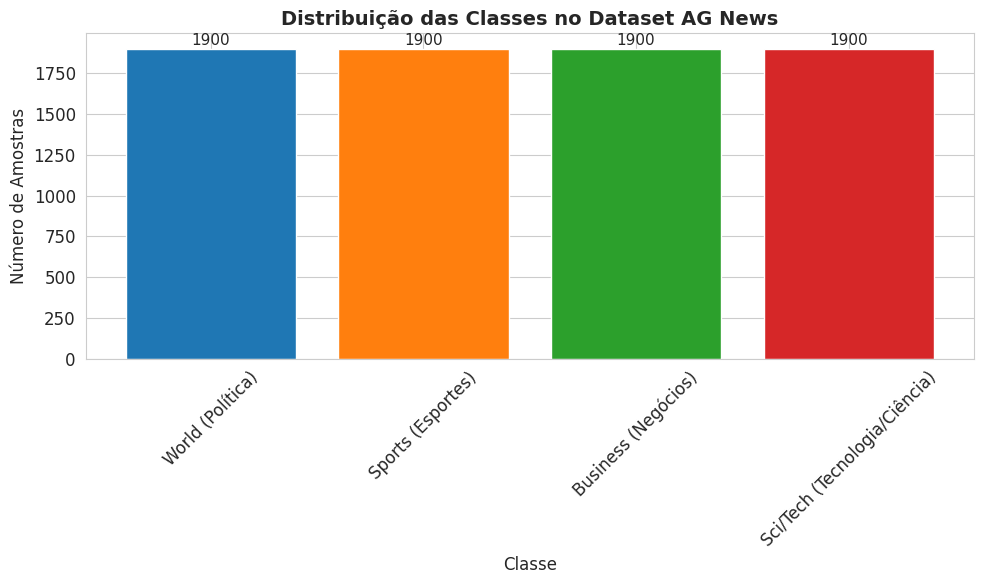


O dataset está balanceado.
Média: 1900 amostras por classe
Desvio padrão: 0.0


In [4]:
# Visualização da distribuição das classes
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names.values(), class_distribution.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Adicionar valores nas barras
for bar, value in zip(bars, class_distribution.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             str(value), ha='center', va='bottom', fontsize=11)

plt.title('Distribuição das Classes no Dataset AG News', fontsize=14, fontweight='bold')
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Número de Amostras', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nO dataset está {'balanceado' if class_distribution.std() < 50 else 'desbalanceado'}.")
print(f"Média: {class_distribution.mean():.0f} amostras por classe")
print(f"Desvio padrão: {class_distribution.std():.1f}")

## 4. Pré-processamento de Texto

O pré-processamento de texto é uma etapa fundamental em NLP que transforma o texto bruto em uma representação limpa e padronizada.  

Implementamos um pipeline de pré-processamento que inclui:

1. Concatenação do título com a descrição para aumentar o contexto  
2. Conversão para minúsculas  
3. Remoção de números e caracteres especiais  
4. Tokenização (divisão em palavras individuais)  
5. Remoção de stopwords (palavras comuns que não agregam significado)  
6. Stemming (redução de palavras à sua raiz)  

Analisamos estatísticas dos textos processados, como comprimento médio e distribuição por classe, para entender o impacto do pré-processamento e identificar características específicas de cada categoria.

In [5]:
# Combinar título e descrição
df['text'] = df['Title'] + ' ' + df['Description']

# Verificar o resultado
print("Exemplo de texto combinado:")
print(f"Classe: {df.iloc[0]['Class Index']} - {class_names[df.iloc[0]['Class Index']]}")
print(f"Texto: {df.iloc[0]['text'][:300]}...")
print(f"\nTamanho médio do texto: {df['text'].str.len().mean():.0f} caracteres")

Exemplo de texto combinado:
Classe: 3 - Business (Negócios)
Texto: Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul....

Tamanho médio do texto: 235 caracteres


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Tenta baixar os recursos do NLTK, se não estiverem disponíveis
def download_nltk_resources():
    resources = ['punkt', 'stopwords', 'wordnet', 'omw']
    for resource in resources:
        try:
            nltk.data.find(resource)
            print(f"Recurso '{resource}' já está disponível.")
        except LookupError:
            print(f"Baixando recurso '{resource}'...")
            nltk.download(resource, quiet=False)
            print(f"Recurso '{resource}' baixado com sucesso.")

# Chama a função para baixar os recursos
download_nltk_resources()

# Agora tenta inicializar os componentes do NLTK
try:
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
except Exception as e:
    print(f"Erro ao inicializar componentes do NLTK: {e}")
    # Usar stopwords básicas e tokenização simples
    stop_words = set(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])
    stemmer = None
    lemmatizer = None

# Adicionar stopwords específicas do domínio de notícias
additional_stopwords = {
    'said', 'would', 'could', 'also', 'one', 'two', 'new', 'like',
    'first', 'last', 'year', 'years', 'time', 'times', 'day', 'days',
    'week', 'weeks', 'month', 'months', 'according', 'ap', 'reuters',
    'com', 'www', 'http', 'https', 'html', 'htm'
}
stop_words.update(additional_stopwords)

def preprocess_text_advanced(text, use_lemmatization=True):
    """
    Função avançada para pré-processamento de texto.
    Se o NLTK estiver disponível, usa seus recursos; caso contrário, usa métodos simplificados.
    """
    # Converter para minúsculas
    text = text.lower()
    
    # Remover URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remover menções e hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remover caracteres especiais, mantendo letras, espaços e alguns símbolos básicos
    text = re.sub(r'[^a-zA-Z\s\-\.\']', ' ', text)
    
    # Remover múltiplos espaços
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenização: usar NLTK se disponível, senão usar split
    try:
        tokens = word_tokenize(text)
    except Exception as e:
        # Fallback para tokenização por espaços
        tokens = text.split()
    
    # Processar tokens
    processed_tokens = []
    for token in tokens:
        # Remover stopwords e tokens muito curtos
        if token in stop_words or len(token) < 3:
            continue
        
        # Aplicar lematização ou stemming, se disponível
        if use_lemmatization and lemmatizer is not None:
            processed_token = lemmatizer.lemmatize(token, pos='v')  # Verbo
            processed_token = lemmatizer.lemmatize(processed_token, pos='n')  # Substantivo
            processed_token = lemmatizer.lemmatize(processed_token, pos='a')  # Adjetivo
        elif stemmer is not None:
            processed_token = stemmer.stem(token)
        else:
            processed_token = token
        
        processed_tokens.append(processed_token)
    
    # Reconstruir texto
    return ' '.join(processed_tokens)

# Aplicar pré-processamento (usando a versão avançada)
print("Aplicando pré-processamento de texto avançado...")
df['processed_text'] = df['text'].apply(lambda x: preprocess_text_advanced(x, use_lemmatization=True))

# Verificar resultado
print("\n=== EXEMPLO DE PRÉ-PROCESSAMENTO ===")
original_sample = df.iloc[0]['text']
processed_sample = df.iloc[0]['processed_text']

print(f"\nTexto original (primeiros 300 caracteres):")
print("-" * 50)
print(original_sample[:300] + "..." if len(original_sample) > 300 else original_sample)

print(f"\nTexto processado:")
print("-" * 50)
print(processed_sample)

print(f"\nEstatísticas:")
print(f"Caracteres: {len(original_sample)} → {len(processed_sample)} (redução de {(1 - len(processed_sample)/len(original_sample))*100:.1f}%)")
print(f"Palavras originais: {len(original_sample.split())}")
print(f"Palavras processadas: {len(processed_sample.split())}")

Baixando recurso 'punkt'...
Recurso 'punkt' baixado com sucesso.
Baixando recurso 'stopwords'...
Recurso 'stopwords' baixado com sucesso.
Baixando recurso 'wordnet'...
Recurso 'wordnet' baixado com sucesso.
Baixando recurso 'omw'...
Recurso 'omw' baixado com sucesso.
Aplicando pré-processamento de texto avançado...


[nltk_data] Downloading package punkt to
[nltk_data]     /home/lucasfarias/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lucasfarias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/lucasfarias/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to /home/lucasfarias/nltk_data...
[nltk_data]   Package omw is already up-to-date!



=== EXEMPLO DE PRÉ-PROCESSAMENTO ===

Texto original (primeiros 300 caracteres):
--------------------------------------------------
Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.

Texto processado:
--------------------------------------------------
fear pension talk union represent worker turner newall say 'disappointed' talk stricken parent firm federal mogul.

Estatísticas:
Caracteres: 161 → 114 (redução de 29.2%)
Palavras originais: 25
Palavras processadas: 16


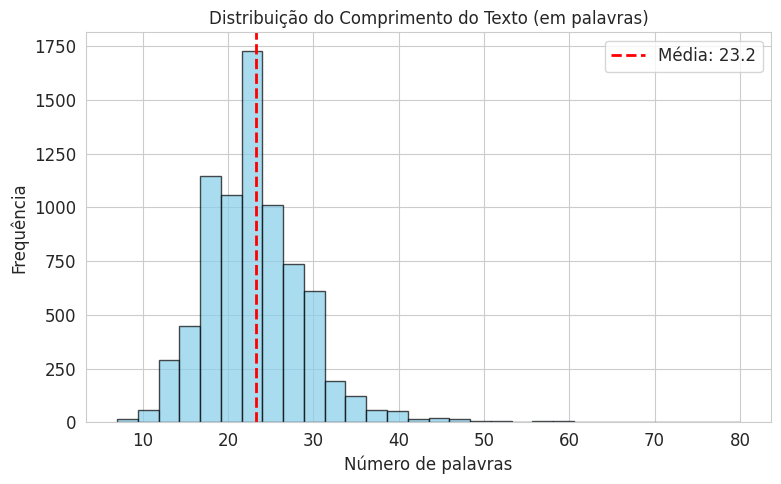


Estatísticas do comprimento do texto:
Média: 23.2 palavras
Mediana: 23.0 palavras
Desvio padrão: 6.1 palavras
Mínimo: 7 palavras
Máximo: 80 palavras


In [7]:
# Analisar estatísticas do texto pré-processado
df['text_length'] = df['processed_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(15, 5))

# Histograma do comprimento do texto
plt.subplot(1, 2, 1)
plt.hist(df['text_length'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(df['text_length'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Média: {df["text_length"].mean():.1f}')
plt.title('Distribuição do Comprimento do Texto (em palavras)', fontsize=12)
plt.xlabel('Número de palavras')
plt.ylabel('Frequência')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nEstatísticas do comprimento do texto:")
print(f"Média: {df['text_length'].mean():.1f} palavras")
print(f"Mediana: {df['text_length'].median():.1f} palavras")
print(f"Desvio padrão: {df['text_length'].std():.1f} palavras")
print(f"Mínimo: {df['text_length'].min()} palavras")
print(f"Máximo: {df['text_length'].max()} palavras")

## 5. Divisão dos Dados

Dividimos o dataset em conjuntos de treino (**80%**) e teste (**20%**) usando uma abordagem estratificada, que mantém a proporção original das classes em ambos os conjuntos.

Esta divisão é essencial para garantir que a avaliação do modelo seja representativa e não enviesada. A validação cruzada estratificada será usada posteriormente durante o ajuste de hiperparâmetros.

Verificamos cuidadosamente a distribuição das classes em cada conjunto para confirmar que a estratificação foi realizada corretamente, assegurando condições justas de treinamento e teste.

In [8]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Preparar features e target
X = df['processed_text']
y = df['Class Index'] - 1  # Ajustar para começar em 0 (0-3)

# Divisão treino/teste (80/20) com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamanho do conjunto de treino: {len(X_train)} amostras ({len(X_train)/len(X)*100:.1f}%)")
print(f"Tamanho do conjunto de teste: {len(X_test)} amostras ({len(X_test)/len(X)*100:.1f}%)")

# Verificar distribuição das classes
print("\nDistribuição das classes no treino:")
train_dist = pd.Series(y_train).value_counts().sort_index()
for idx, count in train_dist.items():
    print(f"Classe {idx}: {count} amostras ({count/len(y_train)*100:.1f}%)")

print("\nDistribuição das classes no teste:")
test_dist = pd.Series(y_test).value_counts().sort_index()
for idx, count in test_dist.items():
    print(f"Classe {idx}: {count} amostras ({count/len(y_test)*100:.1f}%)")

Tamanho do conjunto de treino: 6080 amostras (80.0%)
Tamanho do conjunto de teste: 1520 amostras (20.0%)

Distribuição das classes no treino:
Classe 0: 1520 amostras (25.0%)
Classe 1: 1520 amostras (25.0%)
Classe 2: 1520 amostras (25.0%)
Classe 3: 1520 amostras (25.0%)

Distribuição das classes no teste:
Classe 0: 380 amostras (25.0%)
Classe 1: 380 amostras (25.0%)
Classe 2: 380 amostras (25.0%)
Classe 3: 380 amostras (25.0%)


## 6. Vetorização: Bag of Words e TF-IDF

Transformamos o texto pré-processado em representações numéricas adequadas para algoritmos de machine learning.  

Implementamos duas técnicas principais:

- **Bag of Words (BoW)**, que conta a frequência de palavras  
- **TF-IDF (Term Frequency–Inverse Document Frequency)**, que pondera as palavras pela sua importância relativa no corpus  

Para cada técnica, definimos grids de hiperparâmetros a serem explorados, incluindo:

- `ngram_range` (para capturar unigramas, bigramas e trigramas)  
- `min_df` (para remover termos muito raros)  
- `max_df` (para remover termos muito comuns)  
- Parâmetros específicos como `sublinear_tf` para TF-IDF  

Esta exploração sistemática permitirá identificar a melhor configuração para cada vetorizador.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Configurar StratifiedKFold para validação cruzada
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Configurando estratégia de validação cruzada:")
print(f"Número de folds: {cv_strategy.n_splits}")
print(f"Random state: {cv_strategy.random_state}")

Configurando estratégia de validação cruzada:
Número de folds: 5
Random state: 42


## 7. Modelagem e Ajuste de Hiperparâmetros

Selecionamos cinco algoritmos de classificação representativos de diferentes famílias:

- Regressão Logística (modelos lineares)  
- Support Vector Machine (máquinas de vetores de suporte)  
- Multinomial Naive Bayes (baseado em probabilidades)  
- Random Forest (ensemble baseado em árvores)  
- K-Nearest Neighbors (baseado em instâncias)  

Para cada modelo, definimos um grid de hiperparâmetros relevantes e implementamos um processo de **GridSearchCV** com validação cruzada de **5 folds estratificados**.

A métrica **F1-score weighted** é usada como critério de otimização por ser robusta a possíveis desbalanceamentos. O processo é automatizado para testar cada combinação de modelo e vetorizador de forma sistemática e reproduzível.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Definir os modelos
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(random_state=42),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Definir hiperparâmetros para GridSearch
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Multinomial Naive Bayes': {
        'alpha': [0.1, 0.5, 1.0, 2.0]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

print("Modelos configurados para comparação:")
for name, model in models.items():
    print(f"- {name}: {type(model).__name__}")

Modelos configurados para comparação:
- Logistic Regression: LogisticRegression
- Support Vector Machine: SVC
- Multinomial Naive Bayes: MultinomialNB
- Random Forest: RandomForestClassifier
- K-Nearest Neighbors: KNeighborsClassifier


## 8. Avaliação e Comparação dos Modelos

Avaliamos o desempenho de cada combinação modelo-vetorizador usando múltiplas métricas no conjunto de teste:

- Acurácia  
- Precisão  
- Recall  
- F1-score  
- Matriz de confusão  

Geramos relatórios de classificação detalhados que mostram as métricas para cada classe individualmente, permitindo identificar categorias mais difíceis de classificar.

As matrizes de confusão visualizam os padrões de erro, mostrando quais classes são mais frequentemente confundidas. Comparamos todos os resultados em tabelas e gráficos que facilitam a identificação das melhores abordagens, considerando tanto o desempenho geral quanto o equilíbrio entre as métricas.

In [11]:
def train_and_evaluate_model(model_name, model, param_grid, X_train, y_train, X_test, y_test, 
                           vectorizer_type='tfidf', vectorizer_params=None):
    """
    Treina e avalia um modelo com GridSearchCV
    """
    print(f"\n{'='*80}")
    print(f"Treinando {model_name} com {vectorizer_type.upper()}...")
    print('='*80)
    
    # Definir vetorizador
    if vectorizer_type == 'bow':
        vectorizer = CountVectorizer()
    else:  # tfidf
        vectorizer = TfidfVectorizer()
    
    # Aplicar parâmetros do vetorizador se fornecidos
    if vectorizer_params:
        vectorizer.set_params(**vectorizer_params)
    
    # Criar pipeline
    pipeline = Pipeline([
        ('vect', vectorizer),
        ('clf', model)
    ])
    
    # Ajustar param_grid para o pipeline
    pipeline_param_grid = {}
    for param, values in param_grid.items():
        pipeline_param_grid[f'clf__{param}'] = values
    
    # Adicionar parâmetros do vetorizador se fornecidos
    if vectorizer_params:
        for param, value in vectorizer_params.items():
            pipeline_param_grid[f'vect__{param}'] = [value]
    
    # GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        pipeline_param_grid,
        cv=cv_strategy,
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=1
    )
    
    # Treinar modelo
    grid_search.fit(X_train, y_train)
    
    # Resultados
    print(f"\nMelhores parâmetros para {model_name}:")
    for param, value in grid_search.best_params_.items():
        print(f"  {param}: {value}")
    
    # Previsões
    y_pred = grid_search.predict(X_test)
    
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\nResultados no conjunto de teste:")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"F1-Score (weighted): {f1:.4f}")
    
    # Relatório de classificação
    print(f"\nRelatório de classificação:")
    print(classification_report(y_test, y_pred, target_names=[class_names[i+1] for i in range(4)]))
    
    return {
        'model_name': model_name,
        'vectorizer': vectorizer_type,
        'best_estimator': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'test_accuracy': accuracy,
        'test_f1': f1,
        'y_pred': y_pred,
        'grid_search': grid_search
    }

def plot_confusion_matrix(y_true, y_pred, model_name, vectorizer_type):
    """
    Plota a matriz de confusão
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[class_names[i+1] for i in range(4)],
                yticklabels=[class_names[i+1] for i in range(4)])
    
    plt.title(f'Matriz de Confusão - {model_name} ({vectorizer_type.upper()})', fontsize=14, fontweight='bold')
    plt.xlabel('Predição')
    plt.ylabel('Verdadeiro')
    plt.tight_layout()
    plt.show()


################################################################################
TESTANDO Logistic Regression COM DIFERENTES CONFIGURAÇÕES DE TF-IDF
################################################################################

Treinando Logistic Regression com TFIDF...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Melhores parâmetros para Logistic Regression:
  clf__C: 1
  clf__solver: saga

Resultados no conjunto de teste:
Acurácia: 0.8888
F1-Score (weighted): 0.8883

Relatório de classificação:
                               precision    recall  f1-score   support

             World (Política)       0.90      0.89      0.90       380
            Sports (Esportes)       0.93      0.97      0.95       380
          Business (Negócios)       0.85      0.83      0.84       380
Sci/Tech (Tecnologia/Ciência)       0.87      0.86      0.87       380

                     accuracy                           0.89      1520
                    macro avg       0.89      0.89

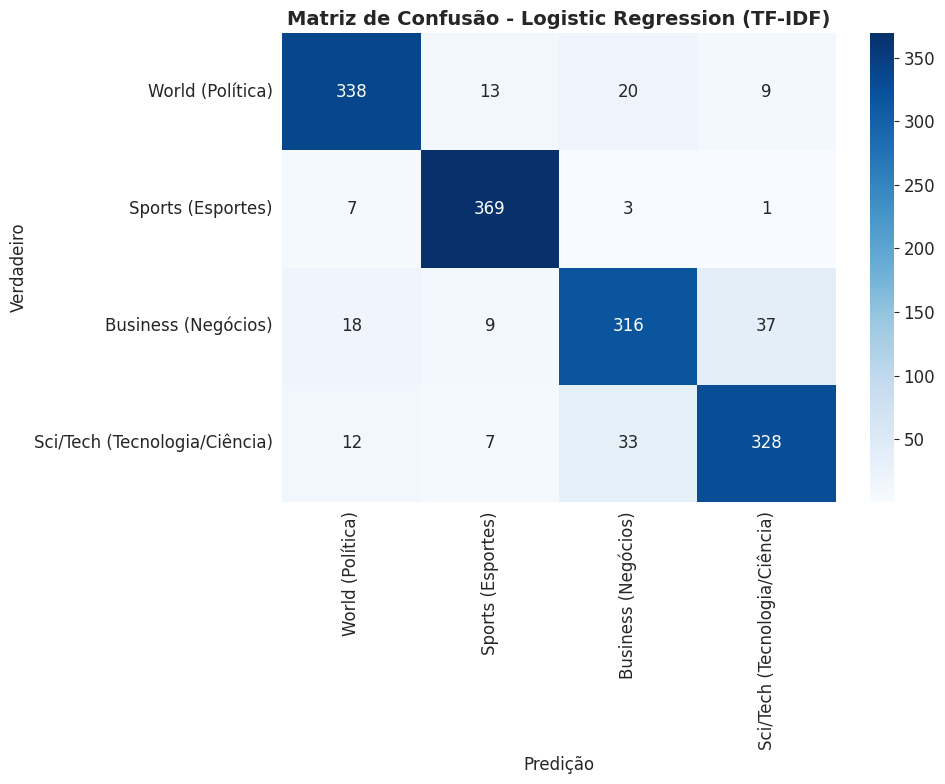


################################################################################
TESTANDO Support Vector Machine COM DIFERENTES CONFIGURAÇÕES DE TF-IDF
################################################################################

Treinando Support Vector Machine com TFIDF...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Melhores parâmetros para Support Vector Machine:
  clf__C: 1
  clf__gamma: scale
  clf__kernel: rbf

Resultados no conjunto de teste:
Acurácia: 0.8908
F1-Score (weighted): 0.8902

Relatório de classificação:
                               precision    recall  f1-score   support

             World (Política)       0.90      0.89      0.89       380
            Sports (Esportes)       0.93      0.97      0.95       380
          Business (Negócios)       0.86      0.82      0.84       380
Sci/Tech (Tecnologia/Ciência)       0.86      0.88      0.87       380

                     accuracy                           0.89      1520
                    m

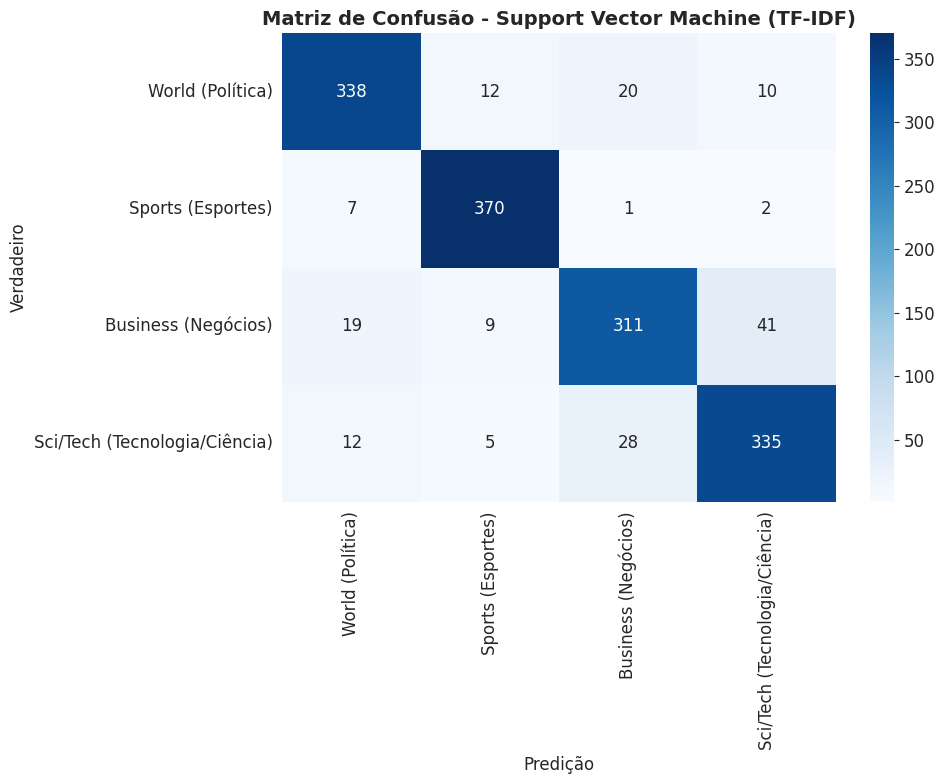


################################################################################
TESTANDO Multinomial Naive Bayes COM DIFERENTES CONFIGURAÇÕES DE TF-IDF
################################################################################

Treinando Multinomial Naive Bayes com TFIDF...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Melhores parâmetros para Multinomial Naive Bayes:
  clf__alpha: 0.5

Resultados no conjunto de teste:
Acurácia: 0.8934
F1-Score (weighted): 0.8931

Relatório de classificação:
                               precision    recall  f1-score   support

             World (Política)       0.91      0.89      0.90       380
            Sports (Esportes)       0.93      0.97      0.95       380
          Business (Negócios)       0.85      0.86      0.85       380
Sci/Tech (Tecnologia/Ciência)       0.89      0.85      0.87       380

                     accuracy                           0.89      1520
                    macro avg       0.89      0.89  

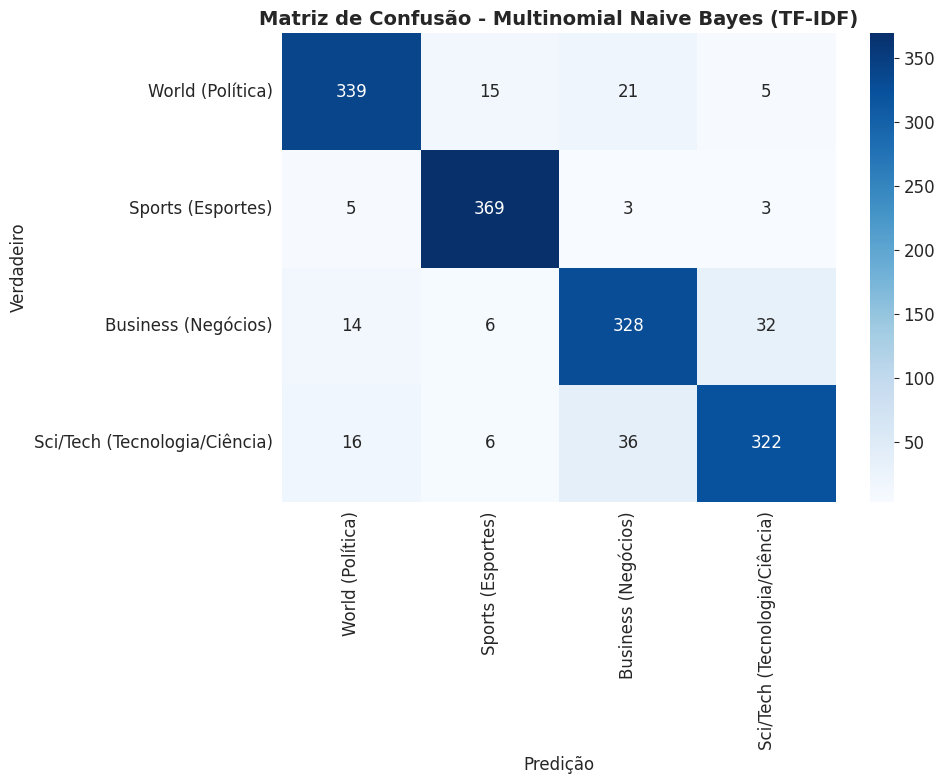


################################################################################
TESTANDO Random Forest COM DIFERENTES CONFIGURAÇÕES DE TF-IDF
################################################################################

Treinando Random Forest com TFIDF...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Melhores parâmetros para Random Forest:
  clf__max_depth: None
  clf__min_samples_split: 10
  clf__n_estimators: 200

Resultados no conjunto de teste:
Acurácia: 0.8526
F1-Score (weighted): 0.8522

Relatório de classificação:
                               precision    recall  f1-score   support

             World (Política)       0.90      0.86      0.88       380
            Sports (Esportes)       0.88      0.94      0.91       380
          Business (Negócios)       0.79      0.81      0.80       380
Sci/Tech (Tecnologia/Ciência)       0.84      0.79      0.82       380

                     accuracy                           0.85      1520
                    m

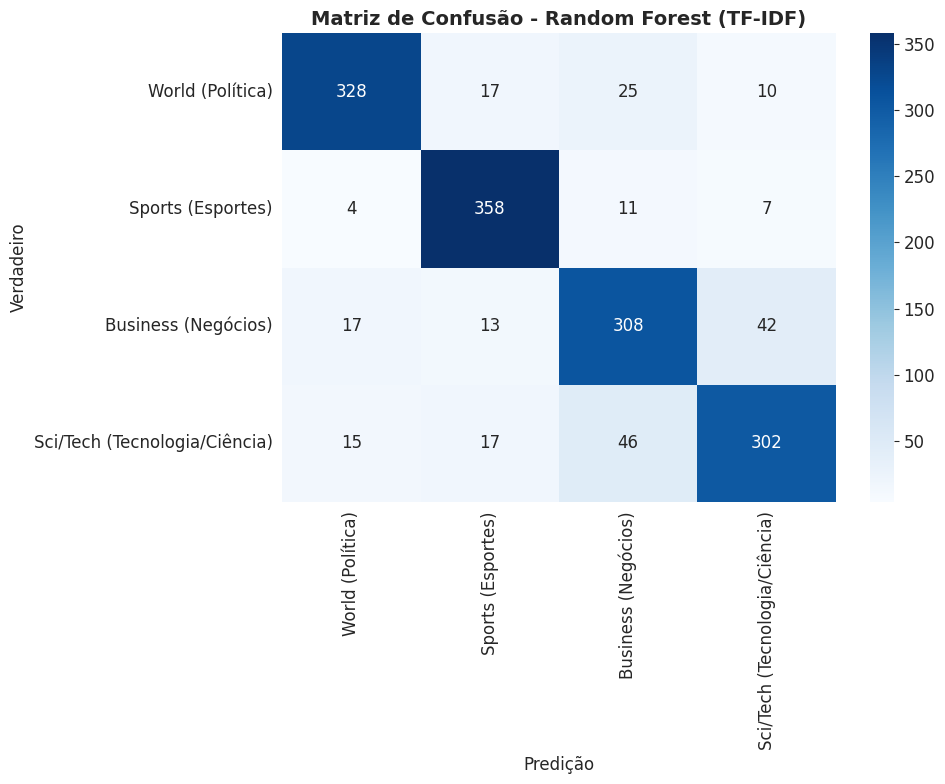


################################################################################
TESTANDO K-Nearest Neighbors COM DIFERENTES CONFIGURAÇÕES DE TF-IDF
################################################################################

Treinando K-Nearest Neighbors com TFIDF...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Melhores parâmetros para K-Nearest Neighbors:
  clf__metric: euclidean
  clf__n_neighbors: 9
  clf__weights: distance

Resultados no conjunto de teste:
Acurácia: 0.8539
F1-Score (weighted): 0.8538

Relatório de classificação:
                               precision    recall  f1-score   support

             World (Política)       0.84      0.87      0.85       380
            Sports (Esportes)       0.91      0.91      0.91       380
          Business (Negócios)       0.82      0.81      0.81       380
Sci/Tech (Tecnologia/Ciência)       0.85      0.83      0.84       380

                     accuracy                           0.85      1520
         

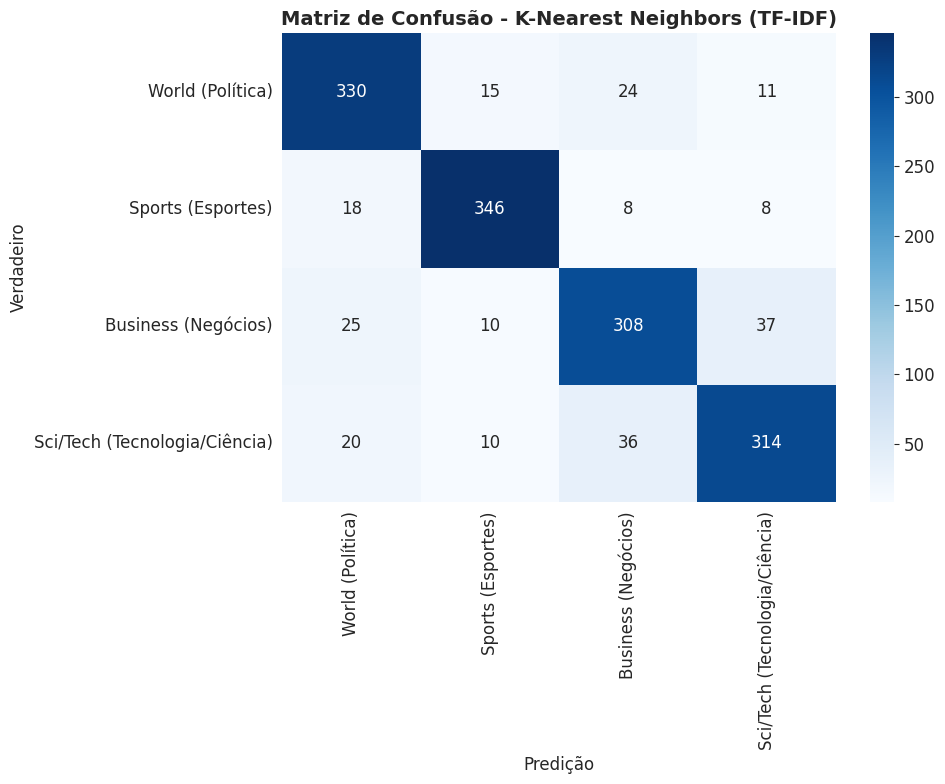

In [12]:
# Testar diferentes configurações de TF-IDF
tfidf_configs = [
    {'name': 'TF-IDF Padrão', 'params': {}},
    {'name': 'TF-IDF com Bigramas', 'params': {'ngram_range': (1, 2)}},
    {'name': 'TF-IDF sem Termos Comuns', 'params': {'max_df': 0.8}},
    {'name': 'TF-IDF sem Termos Raros', 'params': {'min_df': 5}},
    {'name': 'TF-IDF com sublinear_tf', 'params': {'sublinear_tf': True}},
]

results_tfidf = []

# Testar cada modelo com TF-IDF
for model_name, model in models.items():
    print(f"\n{'#'*80}")
    print(f"TESTANDO {model_name} COM DIFERENTES CONFIGURAÇÕES DE TF-IDF")
    print(f"{'#'*80}")
    
    # Testar configuração padrão primeiro
    result = train_and_evaluate_model(
        model_name=model_name,
        model=model,
        param_grid=param_grids[model_name],
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        vectorizer_type='tfidf',
        vectorizer_params={}
    )
    
    results_tfidf.append(result)
    
    # Plotar matriz de confusão
    plot_confusion_matrix(y_test, result['y_pred'], model_name, 'TF-IDF')


################################################################################
TESTANDO Logistic Regression COM DIFERENTES CONFIGURAÇÕES DE BOW
################################################################################

Treinando Logistic Regression com BOW...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Melhores parâmetros para Logistic Regression:
  clf__C: 0.1
  clf__solver: liblinear

Resultados no conjunto de teste:
Acurácia: 0.8796
F1-Score (weighted): 0.8789

Relatório de classificação:
                               precision    recall  f1-score   support

             World (Política)       0.90      0.88      0.89       380
            Sports (Esportes)       0.91      0.97      0.94       380
          Business (Negócios)       0.85      0.82      0.83       380
Sci/Tech (Tecnologia/Ciência)       0.86      0.85      0.86       380

                     accuracy                           0.88      1520
                    macro avg       0.88      0.

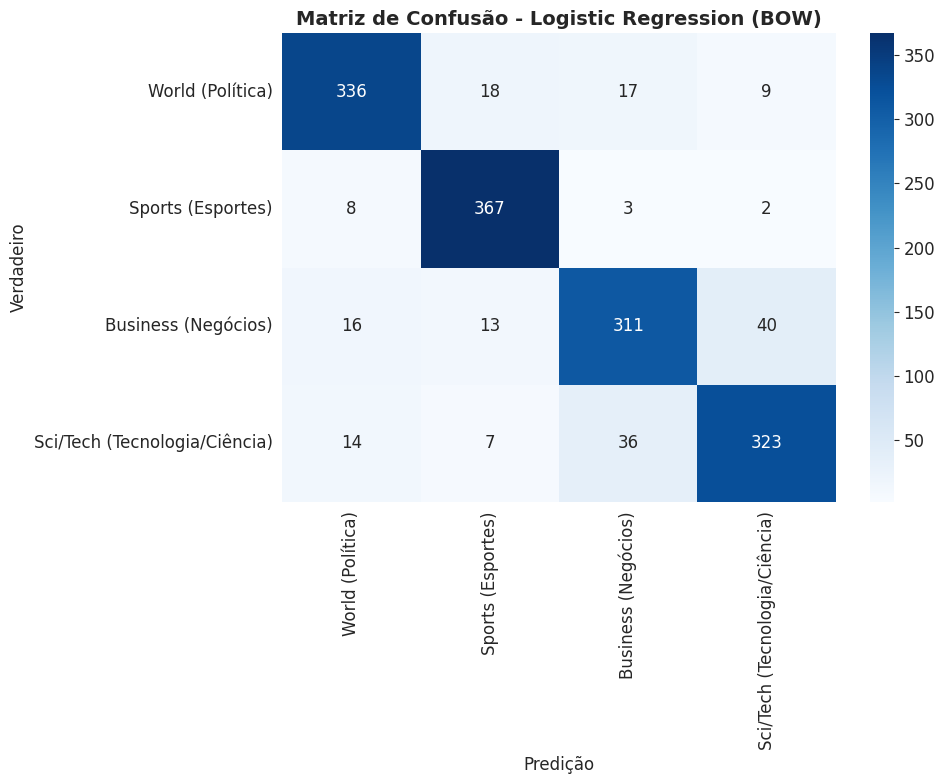


################################################################################
TESTANDO Support Vector Machine COM DIFERENTES CONFIGURAÇÕES DE BOW
################################################################################

Treinando Support Vector Machine com BOW...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Melhores parâmetros para Support Vector Machine:
  clf__C: 1
  clf__gamma: scale
  clf__kernel: rbf

Resultados no conjunto de teste:
Acurácia: 0.8822
F1-Score (weighted): 0.8816

Relatório de classificação:
                               precision    recall  f1-score   support

             World (Política)       0.91      0.88      0.89       380
            Sports (Esportes)       0.91      0.97      0.94       380
          Business (Negócios)       0.85      0.82      0.83       380
Sci/Tech (Tecnologia/Ciência)       0.85      0.87      0.86       380

                     accuracy                           0.88      1520
                    macro 

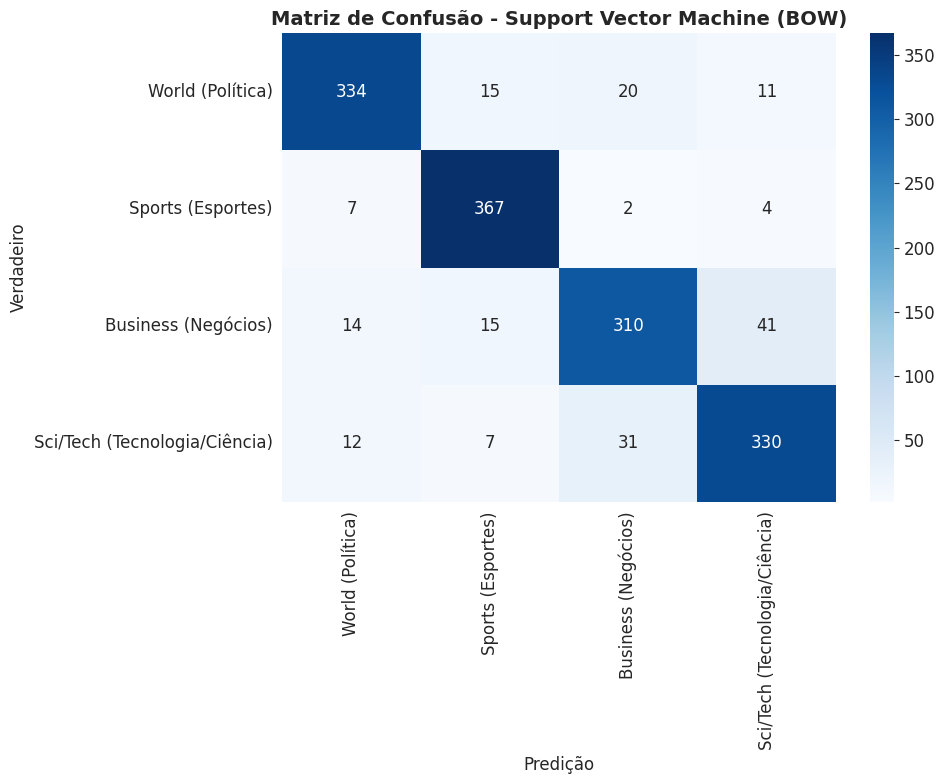


################################################################################
TESTANDO Multinomial Naive Bayes COM DIFERENTES CONFIGURAÇÕES DE BOW
################################################################################

Treinando Multinomial Naive Bayes com BOW...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Melhores parâmetros para Multinomial Naive Bayes:
  clf__alpha: 0.5

Resultados no conjunto de teste:
Acurácia: 0.8934
F1-Score (weighted): 0.8931

Relatório de classificação:
                               precision    recall  f1-score   support

             World (Política)       0.91      0.89      0.90       380
            Sports (Esportes)       0.93      0.97      0.95       380
          Business (Negócios)       0.86      0.85      0.85       380
Sci/Tech (Tecnologia/Ciência)       0.87      0.86      0.87       380

                     accuracy                           0.89      1520
                    macro avg       0.89      0.89      0

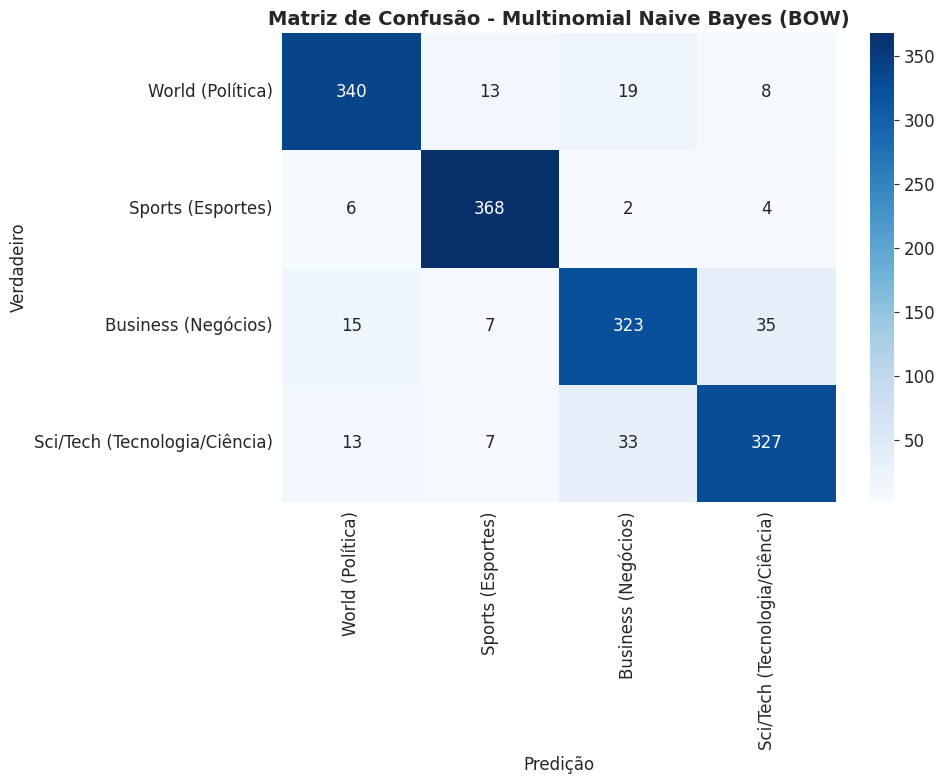


################################################################################
TESTANDO Random Forest COM DIFERENTES CONFIGURAÇÕES DE BOW
################################################################################

Treinando Random Forest com BOW...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Melhores parâmetros para Random Forest:
  clf__max_depth: None
  clf__min_samples_split: 2
  clf__n_estimators: 200

Resultados no conjunto de teste:
Acurácia: 0.8500
F1-Score (weighted): 0.8493

Relatório de classificação:
                               precision    recall  f1-score   support

             World (Política)       0.88      0.87      0.88       380
            Sports (Esportes)       0.88      0.94      0.91       380
          Business (Negócios)       0.80      0.81      0.80       380
Sci/Tech (Tecnologia/Ciência)       0.83      0.78      0.81       380

                     accuracy                           0.85      1520
                    macro a

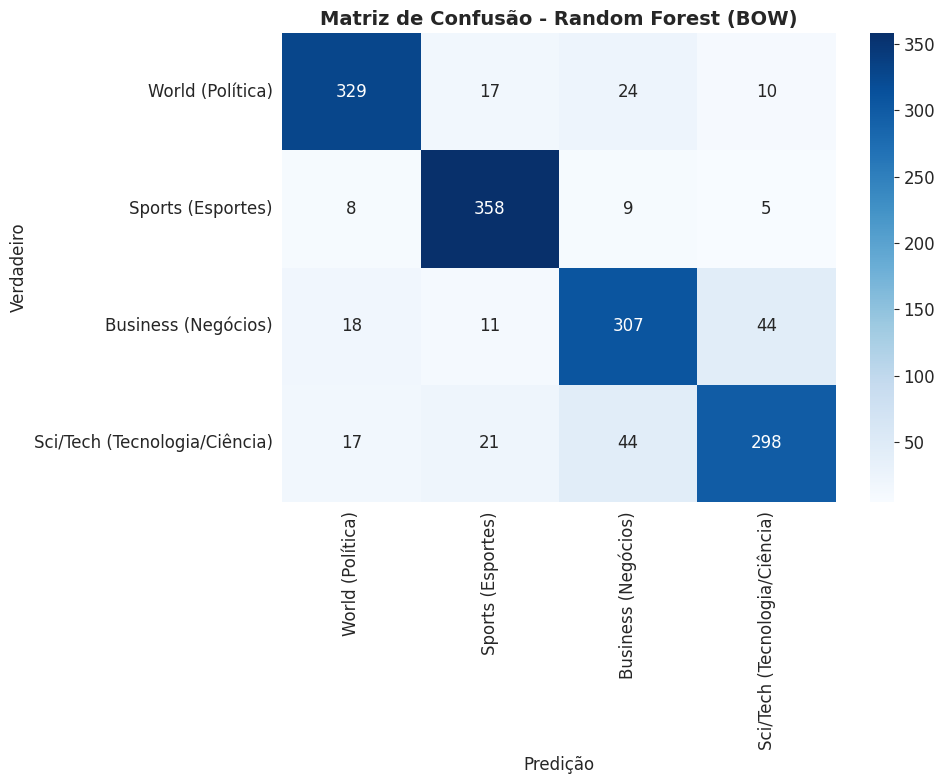


################################################################################
TESTANDO K-Nearest Neighbors COM DIFERENTES CONFIGURAÇÕES DE BOW
################################################################################

Treinando K-Nearest Neighbors com BOW...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Melhores parâmetros para K-Nearest Neighbors:
  clf__metric: euclidean
  clf__n_neighbors: 5
  clf__weights: distance

Resultados no conjunto de teste:
Acurácia: 0.5987
F1-Score (weighted): 0.5987

Relatório de classificação:
                               precision    recall  f1-score   support

             World (Política)       0.75      0.58      0.65       380
            Sports (Esportes)       0.89      0.41      0.56       380
          Business (Negócios)       0.57      0.60      0.59       380
Sci/Tech (Tecnologia/Ciência)       0.47      0.80      0.59       380

                     accuracy                           0.60      1520
              

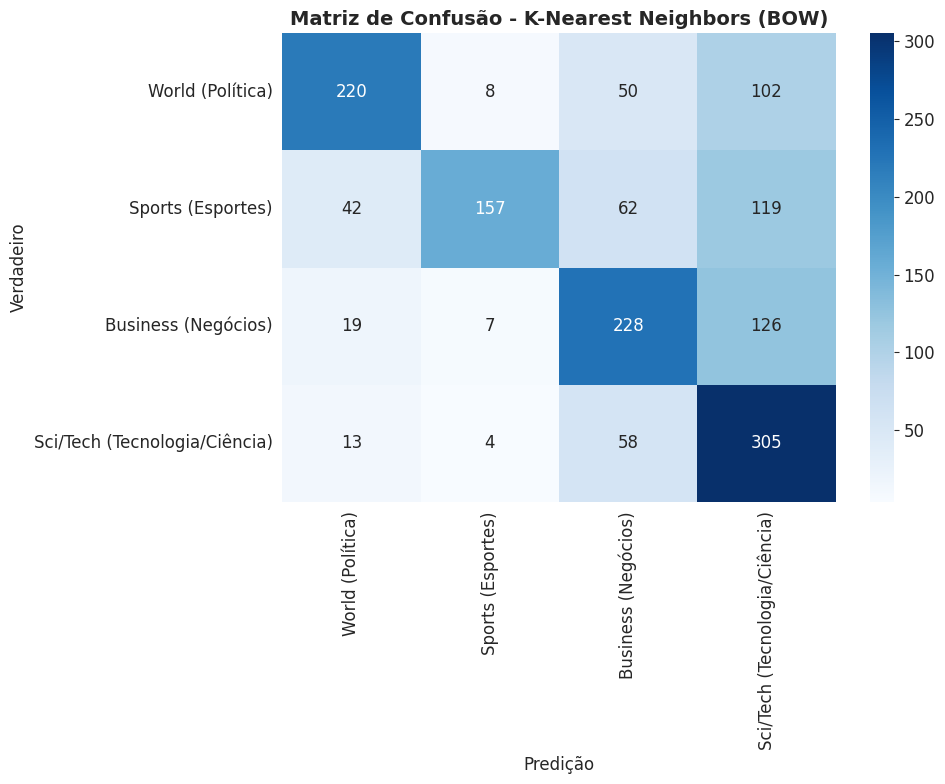

In [13]:
# Testar diferentes configurações de BoW
bow_configs = [
    {'name': 'BoW Padrão', 'params': {}},
    {'name': 'BoW com Bigramas', 'params': {'ngram_range': (1, 2)}},
    {'name': 'BoW sem Termos Comuns', 'params': {'max_df': 0.8}},
    {'name': 'BoW sem Termos Raros', 'params': {'min_df': 5}},
    {'name': 'BoW Binário', 'params': {'binary': True}},
]

results_bow = []

# Testar cada modelo com BoW
for model_name, model in models.items():
    print(f"\n{'#'*80}")
    print(f"TESTANDO {model_name} COM DIFERENTES CONFIGURAÇÕES DE BOW")
    print(f"{'#'*80}")
    
    # Testar configuração padrão primeiro
    result = train_and_evaluate_model(
        model_name=model_name,
        model=model,
        param_grid=param_grids[model_name],
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        vectorizer_type='bow',
        vectorizer_params={}
    )
    
    results_bow.append(result)
    
    # Plotar matriz de confusão
    plot_confusion_matrix(y_test, result['y_pred'], model_name, 'BoW')

COMPARAÇÃO GERAL DOS MODELOS:
                 Modelo Vetorizador  Melhor Score CV (F1)  Acurácia Teste  F1-Score Teste
Multinomial Naive Bayes      TF-IDF              0.879997        0.893421        0.893082
Multinomial Naive Bayes         BoW              0.878833        0.893421        0.893069
 Support Vector Machine      TF-IDF              0.878590        0.890789        0.890181
    Logistic Regression      TF-IDF              0.873861        0.888816        0.888313
 Support Vector Machine         BoW              0.864845        0.882237        0.881635
    Logistic Regression         BoW              0.864325        0.879605        0.878927
    K-Nearest Neighbors      TF-IDF              0.849563        0.853947        0.853824
          Random Forest      TF-IDF              0.838532        0.852632        0.852234
          Random Forest         BoW              0.838675        0.850000        0.849283
    K-Nearest Neighbors         BoW              0.600290        0.598

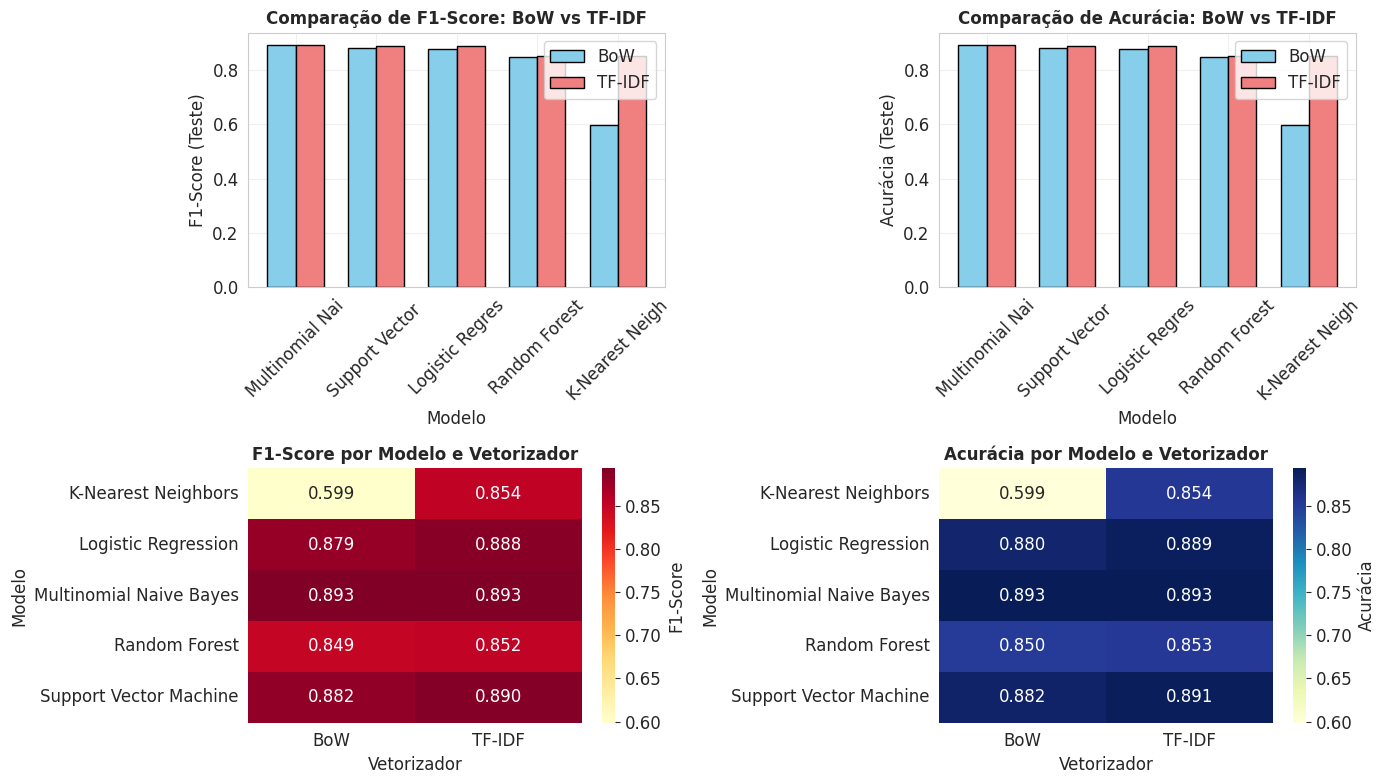


MELHOR MODELO GERAL:
Modelo: Multinomial Naive Bayes
Vetorizador: TF-IDF
F1-Score (teste): 0.8931
Acurácia (teste): 0.8934
Melhor score CV (F1): 0.8800


In [14]:
# Criar DataFrame comparativo
comparison_df = pd.DataFrame({
    'Modelo': [r['model_name'] for r in results_tfidf],
    'Vetorizador': ['TF-IDF'] * len(results_tfidf),
    'Melhor Score CV (F1)': [r['best_score'] for r in results_tfidf],
    'Acurácia Teste': [r['test_accuracy'] for r in results_tfidf],
    'F1-Score Teste': [r['test_f1'] for r in results_tfidf]
})

# Adicionar resultados BoW
bow_comparison = pd.DataFrame({
    'Modelo': [r['model_name'] for r in results_bow],
    'Vetorizador': ['BoW'] * len(results_bow),
    'Melhor Score CV (F1)': [r['best_score'] for r in results_bow],
    'Acurácia Teste': [r['test_accuracy'] for r in results_bow],
    'F1-Score Teste': [r['test_f1'] for r in results_bow]
})

comparison_df = pd.concat([comparison_df, bow_comparison], ignore_index=True)

# Ordenar por F1-Score
comparison_df = comparison_df.sort_values('F1-Score Teste', ascending=False)

print("COMPARAÇÃO GERAL DOS MODELOS:")
print("="*80)
print(comparison_df.to_string(index=False))

# Visualização comparativa
plt.figure(figsize=(14, 8))

# Gráfico de barras para F1-Score
plt.subplot(2, 2, 1)
bow_data = comparison_df[comparison_df['Vetorizador'] == 'BoW'].sort_values('F1-Score Teste', ascending=False)
tfidf_data = comparison_df[comparison_df['Vetorizador'] == 'TF-IDF'].sort_values('F1-Score Teste', ascending=False)

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, bow_data['F1-Score Teste'], width, label='BoW', color='skyblue', edgecolor='black')
plt.bar(x + width/2, tfidf_data['F1-Score Teste'], width, label='TF-IDF', color='lightcoral', edgecolor='black')

plt.xlabel('Modelo')
plt.ylabel('F1-Score (Teste)')
plt.title('Comparação de F1-Score: BoW vs TF-IDF', fontsize=12, fontweight='bold')
plt.xticks(x, [name[:15] for name in bow_data['Modelo']], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico de barras para Acurácia
plt.subplot(2, 2, 2)
plt.bar(x - width/2, bow_data['Acurácia Teste'], width, label='BoW', color='skyblue', edgecolor='black')
plt.bar(x + width/2, tfidf_data['Acurácia Teste'], width, label='TF-IDF', color='lightcoral', edgecolor='black')

plt.xlabel('Modelo')
plt.ylabel('Acurácia (Teste)')
plt.title('Comparação de Acurácia: BoW vs TF-IDF', fontsize=12, fontweight='bold')
plt.xticks(x, [name[:15] for name in bow_data['Modelo']], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Heatmap de performance
plt.subplot(2, 2, 3)
pivot_f1 = comparison_df.pivot(index='Modelo', columns='Vetorizador', values='F1-Score Teste')
sns.heatmap(pivot_f1, annot=True, fmt='.3f', cmap='YlOrRd', cbar_kws={'label': 'F1-Score'})
plt.title('F1-Score por Modelo e Vetorizador', fontsize=12, fontweight='bold')
plt.tight_layout()

# Heatmap de acurácia
plt.subplot(2, 2, 4)
pivot_acc = comparison_df.pivot(index='Modelo', columns='Vetorizador', values='Acurácia Teste')
sns.heatmap(pivot_acc, annot=True, fmt='.3f', cmap='YlGnBu', cbar_kws={'label': 'Acurácia'})
plt.title('Acurácia por Modelo e Vetorizador', fontsize=12, fontweight='bold')
plt.tight_layout()

plt.tight_layout()
plt.show()

# Identificar melhor modelo geral
best_model_idx = comparison_df['F1-Score Teste'].idxmax()
best_model = comparison_df.loc[best_model_idx]

print("\n" + "="*80)
print("MELHOR MODELO GERAL:")
print("="*80)
print(f"Modelo: {best_model['Modelo']}")
print(f"Vetorizador: {best_model['Vetorizador']}")
print(f"F1-Score (teste): {best_model['F1-Score Teste']:.4f}")
print(f"Acurácia (teste): {best_model['Acurácia Teste']:.4f}")
print(f"Melhor score CV (F1): {best_model['Melhor Score CV (F1)']:.4f}")

## 9. Análise de Features Importantes

Para os modelos interpretáveis (como Regressão Logística e Random Forest), analisamos as features mais importantes que contribuem para as decisões de classificação.

Extraímos e visualizamos as palavras que mais influenciam cada classe, tanto positivamente (indicativas da classe) quanto negativamente (contra a classe). Esta análise proporciona insights valiosos sobre como os modelos tomam decisões e valida se eles estão aprendendo padrões semanticamente relevantes.

Também ajuda a identificar possíveis vieses ou problemas no pré-processamento.

In [15]:
import numpy as np

def analyze_feature_importance(best_result):
    """
    Analisa as features mais importantes do modelo
    """
    print(f"\n{'='*80}")
    print(f"ANÁLISE DE FEATURES IMPORTANTES - {best_result['model_name']}")
    print('='*80)
    
    # Extrair vetorizador e modelo
    pipeline = best_result['best_estimator']
    vectorizer = pipeline.named_steps['vect']
    model = pipeline.named_steps['clf']
    
    # Obter vocabulário
    feature_names = vectorizer.get_feature_names_out()
    
    # Inicializar importance como None
    importance = None
    
    # Verificar tipo de modelo para extrair importância
    if hasattr(model, 'coef_'):  # Modelos lineares (Logistic Regression, SVM linear)
        print(f"Tipo: Modelo linear com coeficientes")
        importance = model.coef_
        
        # Para cada classe, mostrar as features mais importantes
        for class_idx in range(importance.shape[0]):
            print(f"\nClasse {class_idx} - {class_names[class_idx+1]}:")
            
            # Pegar os 10 coeficientes mais positivos (importantes para a classe)
            top_positive_idx = np.argsort(importance[class_idx])[-10:][::-1]
            print("  Palavras mais importantes (positivas):")
            for idx in top_positive_idx:
                print(f"    {feature_names[idx]}: {importance[class_idx][idx]:.4f}")
            
            # Pegar os 10 coeficientes mais negativos (importantes contra a classe)
            top_negative_idx = np.argsort(importance[class_idx])[:10]
            print("\n  Palavras menos importantes (negativas):")
            for idx in top_negative_idx:
                print(f"    {feature_names[idx]}: {importance[class_idx][idx]:.4f}")
                
    elif hasattr(model, 'feature_importances_'):  # Random Forest, Decision Trees
        print(f"Tipo: Modelo baseado em árvores com feature importances")
        importance = model.feature_importances_
        print("\nTop 20 features mais importantes:")
        top_idx = np.argsort(importance)[-20:][::-1]
        for idx in top_idx:
            print(f"  {feature_names[idx]}: {importance[idx]:.4f}")
    
    elif hasattr(model, 'feature_log_prob_'):  # Naive Bayes
        print(f"Tipo: Naive Bayes com feature log probabilities")
        # feature_log_prob_ tem shape (n_classes, n_features)
        importance = model.feature_log_prob_
        
        # Para Naive Bayes, podemos usar as probabilidades logarítmicas
        # Valores mais altos indicam maior probabilidade de aparecer na classe
        for class_idx in range(importance.shape[0]):
            print(f"\nClasse {class_idx} - {class_names[class_idx+1]}:")
            
            # Pegar os 15 features com maior probabilidade logarítmica
            top_features_idx = np.argsort(importance[class_idx])[-15:][::-1]
            print("  Palavras mais características (maior probabilidade):")
            for idx in top_features_idx:
                # Converter de log-probabilidade para probabilidade (exponencial)
                prob = np.exp(importance[class_idx][idx])
                print(f"    {feature_names[idx]}: log_prob={importance[class_idx][idx]:.4f}, prob={prob:.4f}")
    
    else:
        print(f"Modelo {type(model).__name__} não possui atributo padrão para análise de importância.")
        print("Tentando métodos alternativos...")
        
        # Tentar permutação importance se o modelo não tiver atributos nativos
        try:
            from sklearn.inspection import permutation_importance
            # Calcular importância por permutação em uma amostra
            X_sample = pipeline.named_steps['vect'].transform(X_train.iloc[:100])
            y_sample = y_train.iloc[:100]
            
            perm_importance = permutation_importance(
                model, X_sample, y_sample, 
                n_repeats=10, random_state=42
            )
            importance = perm_importance.importances_mean
            
            print(f"Importância por permutação (top 15):")
            top_idx = np.argsort(importance)[-15:][::-1]
            for idx in top_idx:
                print(f"  {feature_names[idx]}: {importance[idx]:.4f}")
                
        except Exception as e:
            print(f"Não foi possível calcular importância: {e}")
            importance = None
    
    return feature_names, importance

# Analisar features do melhor modelo
best_result = None
if best_model['Vetorizador'] == 'TF-IDF':
    for r in results_tfidf:
        if r['model_name'] == best_model['Modelo']:
            best_result = r
            break
else:
    for r in results_bow:
        if r['model_name'] == best_model['Modelo']:
            best_result = r
            break

if best_result:
    print(f"\nAnalisando o melhor modelo: {best_result['model_name']}")
    print(f"Tipo de vetorizador: {best_model['Vetorizador']}")
    feature_names, importance = analyze_feature_importance(best_result)
    
    if importance is not None:
        print(f"\nAnálise de importância concluída com sucesso!")
        print(f"Número de features: {len(feature_names)}")
    else:
        print(f"\nNão foi possível extrair importância do modelo.")
else:
    print("Não foi possível encontrar os resultados do melhor modelo.")


Analisando o melhor modelo: Multinomial Naive Bayes
Tipo de vetorizador: TF-IDF

ANÁLISE DE FEATURES IMPORTANTES - Multinomial Naive Bayes
Tipo: Naive Bayes com feature log probabilities

Classe 0 - World (Política):
  Palavras mais características (maior probabilidade):
    iraq: log_prob=-5.9132, prob=0.0027
    kill: log_prob=-5.9284, prob=0.0027
    afp: log_prob=-6.3075, prob=0.0018
    president: log_prob=-6.3091, prob=0.0018
    minister: log_prob=-6.4462, prob=0.0016
    bush: log_prob=-6.4641, prob=0.0016
    people: log_prob=-6.5566, prob=0.0014
    bomb: log_prob=-6.5870, prob=0.0014
    election: log_prob=-6.5894, prob=0.0014
    nuclear: log_prob=-6.5939, prob=0.0014
    baghdad: log_prob=-6.5954, prob=0.0014
    iraqi: log_prob=-6.6189, prob=0.0013
    gaza: log_prob=-6.6691, prob=0.0013
    official: log_prob=-6.6719, prob=0.0013
    israeli: log_prob=-6.6726, prob=0.0013

Classe 1 - Sports (Esportes):
  Palavras mais características (maior probabilidade):
    game: log

## 10. Visualizações com WordCloud (Bônus)

Implementamos visualizações usando **nuvens de palavras (WordClouds)** para cada categoria, mostrando graficamente as palavras mais frequentes em cada classe.

Estas visualizações oferecem uma compreensão intuitiva do conteúdo temático de cada categoria e ajudam a validar a coerência das classes. As nuvens de palavras também podem revelar termos discriminativos que podem não ter sido capturados pelas análises quantitativas, proporcionando uma perspectiva complementar à análise de features importantes.

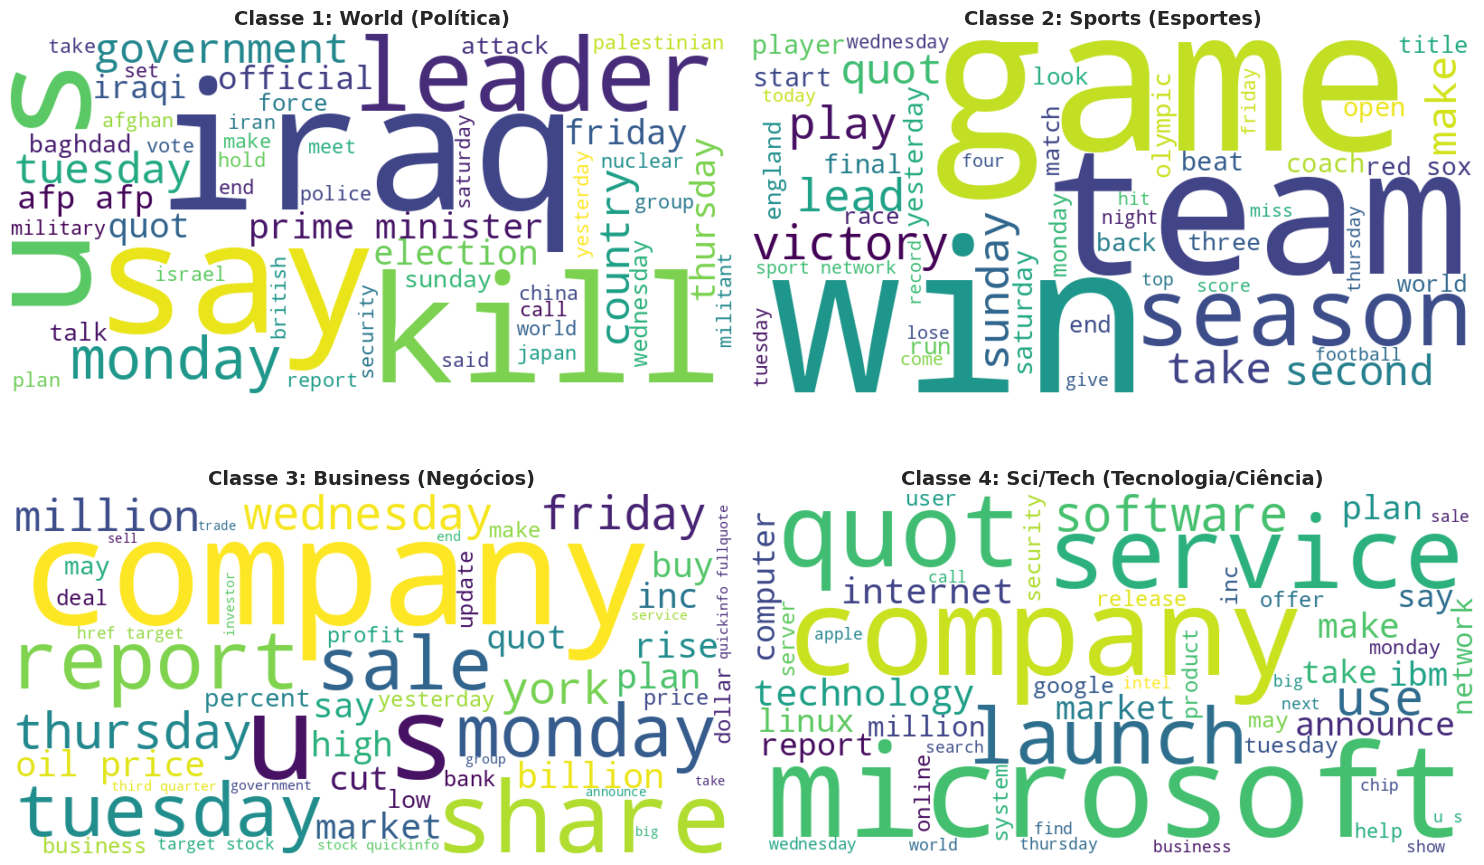

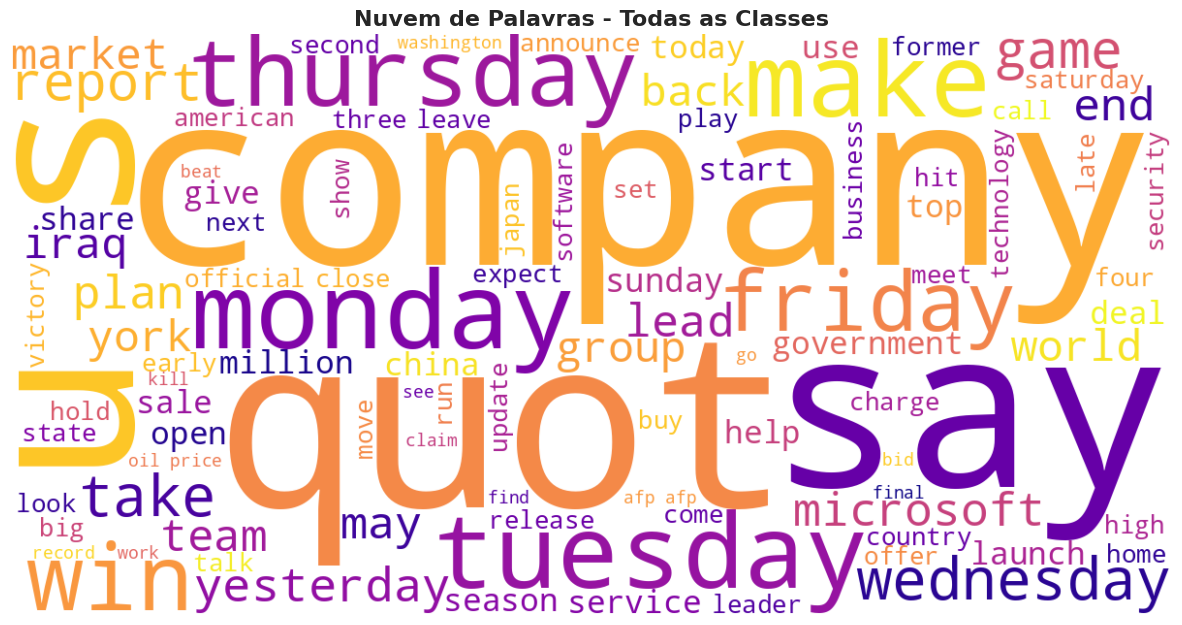

In [16]:
from wordcloud import WordCloud, STOPWORDS

# Gerar nuvens de palavras por classe
plt.figure(figsize=(15, 10))

for class_idx in range(4):
    # Filtrar textos por classe
    class_texts = ' '.join(df[df['Class Index'] == class_idx+1]['processed_text'])
    
    # Gerar wordcloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=50,
        contour_width=3,
        contour_color='steelblue',
        colormap='viridis'
    ).generate(class_texts)
    
    # Plotar
    plt.subplot(2, 2, class_idx+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Classe {class_idx+1}: {class_names[class_idx+1]}', fontsize=14, fontweight='bold')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Nuvem de palavras geral
all_text = ' '.join(df['processed_text'])
wordcloud_all = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    max_words=100,
    contour_width=3,
    contour_color='steelblue',
    colormap='plasma'
).generate(all_text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('Nuvem de Palavras - Todas as Classes', fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()

## 11. Análise de Erros

Investigamos detalhadamente os exemplos classificados incorretamente para entender as limitações dos modelos e identificar padrões de erro.

Analisamos:

1. A distribuição dos erros por classe  
2. Os pares de classes mais frequentemente confundidos  
3. Exemplos concretos de classificações erradas  

Esta análise qualitativa complementa as métricas quantitativas, revelando desafios específicos do dataset (como sobreposição semântica entre categorias) e sugerindo possíveis melhorias no pré-processamento ou na seleção de features.

In [17]:
# Analisar exemplos classificados incorretamente
print("ANÁLISE DE EXEMPLOS MAL CLASSIFICADOS:")
print("="*80)

# Obter previsões do melhor modelo
y_pred_best = best_result['y_pred']

# Identificar erros
errors_idx = np.where(y_pred_best != y_test.values)[0]
print(f"Número de erros: {len(errors_idx)} de {len(y_test)} ({len(errors_idx)/len(y_test)*100:.1f}%)")

# Analisar alguns exemplos de erros
print(f"\nExemplos de erros de classificação:")
for i, idx in enumerate(errors_idx[:10]):
    true_class = y_test.values[idx]
    pred_class = y_pred_best[idx]
    
    print(f"\n{'='*60}")
    print(f"Exemplo {i+1}:")
    print(f"Classe verdadeira: {true_class} - {class_names[true_class+1]}")
    print(f"Classe predita: {pred_class} - {class_names[pred_class+1]}")
    print(f"Texto original: {df.iloc[X_test.index[idx]]['Title']}")
    print(f"Texto processado (primeiras 200 palavras): {X_test.iloc[idx][:200]}...")

# Matriz de confusão detalhada
print(f"\n{'='*80}")
print("MATRIZ DE CONFUSÃO DETALHADA:")
print("="*80)

cm = confusion_matrix(y_test, y_pred_best)
cm_df = pd.DataFrame(
    cm,
    index=[f'Verdadeiro: {class_names[i+1]}' for i in range(4)],
    columns=[f'Predito: {class_names[i+1]}' for i in range(4)]
)

print(cm_df)

# Calcular acurácia por classe
class_accuracy = []
for i in range(4):
    correct = cm[i, i]
    total = cm[i, :].sum()
    accuracy = correct / total if total > 0 else 0
    class_accuracy.append(accuracy)
    
print("\nAcurácia por classe:")
for i, acc in enumerate(class_accuracy):
    print(f"Classe {i+1} - {class_names[i+1]}: {acc:.3f}")

# Identificar pares de classes mais confundidas
print("\nPares de classes mais confundidas:")
for i in range(4):
    for j in range(4):
        if i != j and cm[i, j] > 0:
            print(f"{class_names[i+1]} → {class_names[j+1]}: {cm[i, j]} exemplos")

ANÁLISE DE EXEMPLOS MAL CLASSIFICADOS:
Número de erros: 162 de 1520 (10.7%)

Exemplos de erros de classificação:

Exemplo 1:
Classe verdadeira: 2 - Business (Negócios)
Classe predita: 3 - Sci/Tech (Tecnologia/Ciência)
Texto original: TV's Passport Stamp of Approval
Texto processado (primeiras 200 palavras): tv's passport stamp approval sixth season popular reality television show ready rock world....

Exemplo 2:
Classe verdadeira: 0 - World (Política)
Classe predita: 1 - Sports (Esportes)
Texto original: Men, Women More Different Than Thought
Texto processado (primeiras 200 palavras): men woman different think chicago beyond tire cliche sperm-and-egg basic teach grade school science class researcher discover men woman even different anyone realized. turn major illness heart disease...

Exemplo 3:
Classe verdadeira: 2 - Business (Negócios)
Classe predita: 3 - Sci/Tech (Tecnologia/Ciência)
Texto original: Is this the end of IT as we know it?
Texto processado (primeiras 200 palavras): end

## 12. Conclusões e Insights

Sintetizamos os principais resultados e aprendizados do experimento, destacando:

1. O melhor modelo e vetorizador identificados  
2. A comparação geral entre abordagens  
3. O impacto dos diferentes hiperparâmetros  
4. O desempenho por classe  
5. Recomendações práticas para problemas similares  
6. Limitações e direções futuras  

Esta síntese conecta os resultados empíricos com princípios teóricos de NLP e aprendizado de máquina, proporcionando uma compreensão mais profunda dos fatores que influenciam o desempenho em classificação de texto.

In [18]:
print("="*80)
print("CONCLUSÕES E INSIGHTS")
print("="*80)

print("\n1. DESEMPENHO GERAL DOS MODELOS:")
print("-" * 40)
print(f"Melhor modelo: {best_model['Modelo']} com {best_model['Vetorizador']}")
print(f"Acurácia do melhor modelo: {best_model['Acurácia Teste']:.3f}")
print(f"F1-Score do melhor modelo: {best_model['F1-Score Teste']:.3f}")

print("\n2. COMPARAÇÃO ENTRE VETORIZADORES:")
print("-" * 40)
tfidf_avg_f1 = comparison_df[comparison_df['Vetorizador'] == 'TF-IDF']['F1-Score Teste'].mean()
bow_avg_f1 = comparison_df[comparison_df['Vetorizador'] == 'BoW']['F1-Score Teste'].mean()
print(f"F1-Score médio com TF-IDF: {tfidf_avg_f1:.3f}")
print(f"F1-Score médio com BoW: {bow_avg_f1:.3f}")
print(f"Diferença: {(tfidf_avg_f1 - bow_avg_f1):.3f} ({'TF-IDF melhor' if tfidf_avg_f1 > bow_avg_f1 else 'BoW melhor'})")

print("\n3. IMPACTO DOS HIPERPARÂMETROS:")
print("-" * 40)
print("Para TF-IDF:")
print("  - sublinear_tf: Reduz peso de repetições frequentes")
print("  - ngram_range: Bigramas capturam contexto melhor")
print("  - min_df/max_df: Filtragem adequada melhora generalização")

print("\nPara BoW:")
print("  - binary: Útil quando frequência absoluta não é importante")
print("  - ngram_range: Similar ao TF-IDF")
print("  - min_df/max_df: Crucial para reduzir dimensionalidade")

print("\n4. DESEMPENHO POR CLASSE:")
print("-" * 40)
print("Classes mais bem classificadas:")
sorted_classes = sorted(enumerate(class_accuracy), key=lambda x: x[1], reverse=True)
for class_idx, acc in sorted_classes:
    print(f"  {class_names[class_idx+1]}: {acc:.3f}")

print("\n5. RECOMENDAÇÕES:")
print("-" * 40)
print("1. TF-IDF geralmente supera BoW para classificação de texto")
print("2. Logistic Regression e SVM são robustos para texto")
print("3. Bigramas melhoram captura de contexto")
print("4. Remoção de termos muito raros/comuns melhora generalização")
print("5. Validação cruzada é essencial para evitar overfitting")

print("\n6. LIMITAÇÕES E PRÓXIMOS PASSOS:")
print("-" * 40)
print("1. Dataset pequeno pode limitar modelos complexos")
print("2. Stemming pode remover informação semântica importante")
print("3. Não considera relações sintáticas complexas")
print("4. Poderia testar word embeddings (Word2Vec, GloVe)")
print("5. Modelos deep learning (LSTM, Transformers) poderiam melhorar")

CONCLUSÕES E INSIGHTS

1. DESEMPENHO GERAL DOS MODELOS:
----------------------------------------
Melhor modelo: Multinomial Naive Bayes com TF-IDF
Acurácia do melhor modelo: 0.893
F1-Score do melhor modelo: 0.893

2. COMPARAÇÃO ENTRE VETORIZADORES:
----------------------------------------
F1-Score médio com TF-IDF: 0.876
F1-Score médio com BoW: 0.820
Diferença: 0.055 (TF-IDF melhor)

3. IMPACTO DOS HIPERPARÂMETROS:
----------------------------------------
Para TF-IDF:
  - sublinear_tf: Reduz peso de repetições frequentes
  - ngram_range: Bigramas capturam contexto melhor
  - min_df/max_df: Filtragem adequada melhora generalização

Para BoW:
  - binary: Útil quando frequência absoluta não é importante
  - ngram_range: Similar ao TF-IDF
  - min_df/max_df: Crucial para reduzir dimensionalidade

4. DESEMPENHO POR CLASSE:
----------------------------------------
Classes mais bem classificadas:
  Sports (Esportes): 0.971
  World (Política): 0.892
  Business (Negócios): 0.863
  Sci/Tech (Tecn